In [ ]:
# Rainfall Weather Forecasting Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv")

In [73]:
df.head(501)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2010-04-11,Albury,14.2,18.7,7.0,NaN,NaN,WNW,57.0,NW,...,86.0,43.0,1010.1,1010.2,8.0,2.0,15.9,17.8,Yes,No
497,2010-04-12,Albury,5.6,17.4,0.0,NaN,NaN,SW,41.0,W,...,71.0,54.0,1018.1,1017.3,NaN,8.0,11.0,16.0,No,No
498,2010-04-13,Albury,4.6,19.9,0.0,NaN,NaN,SW,19.0,SSW,...,82.0,49.0,1023.8,1021.1,NaN,NaN,10.1,19.5,No,No
499,2010-04-14,Albury,5.1,21.9,0.0,NaN,NaN,SSE,19.0,E,...,81.0,49.0,1023.6,1020.1,NaN,NaN,12.5,21.6,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
df.shape

(8425, 23)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<Axes: >

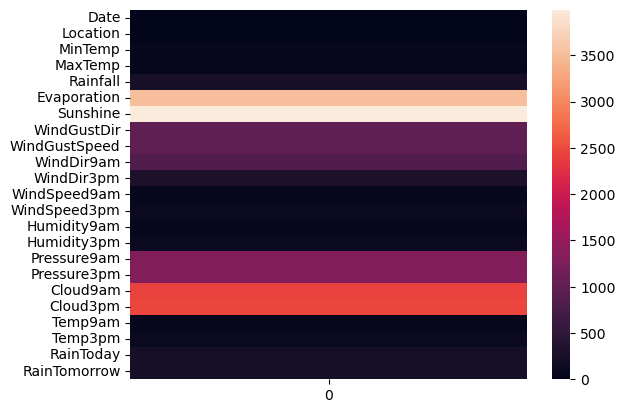

In [9]:
sns.heatmap(df.isnull().sum().to_frame())

<Axes: xlabel='RainTomorrow', ylabel='count'>

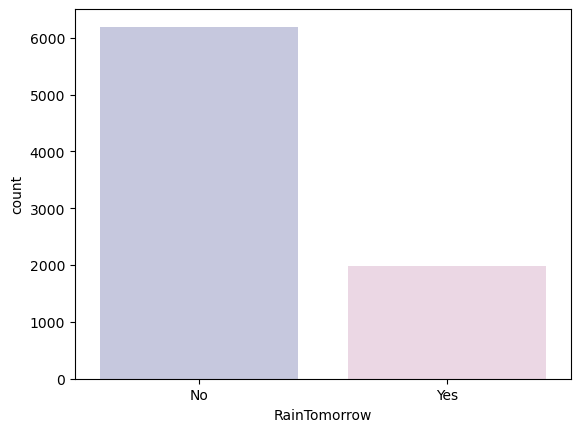

In [11]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= df["RainTomorrow"], palette= cols)

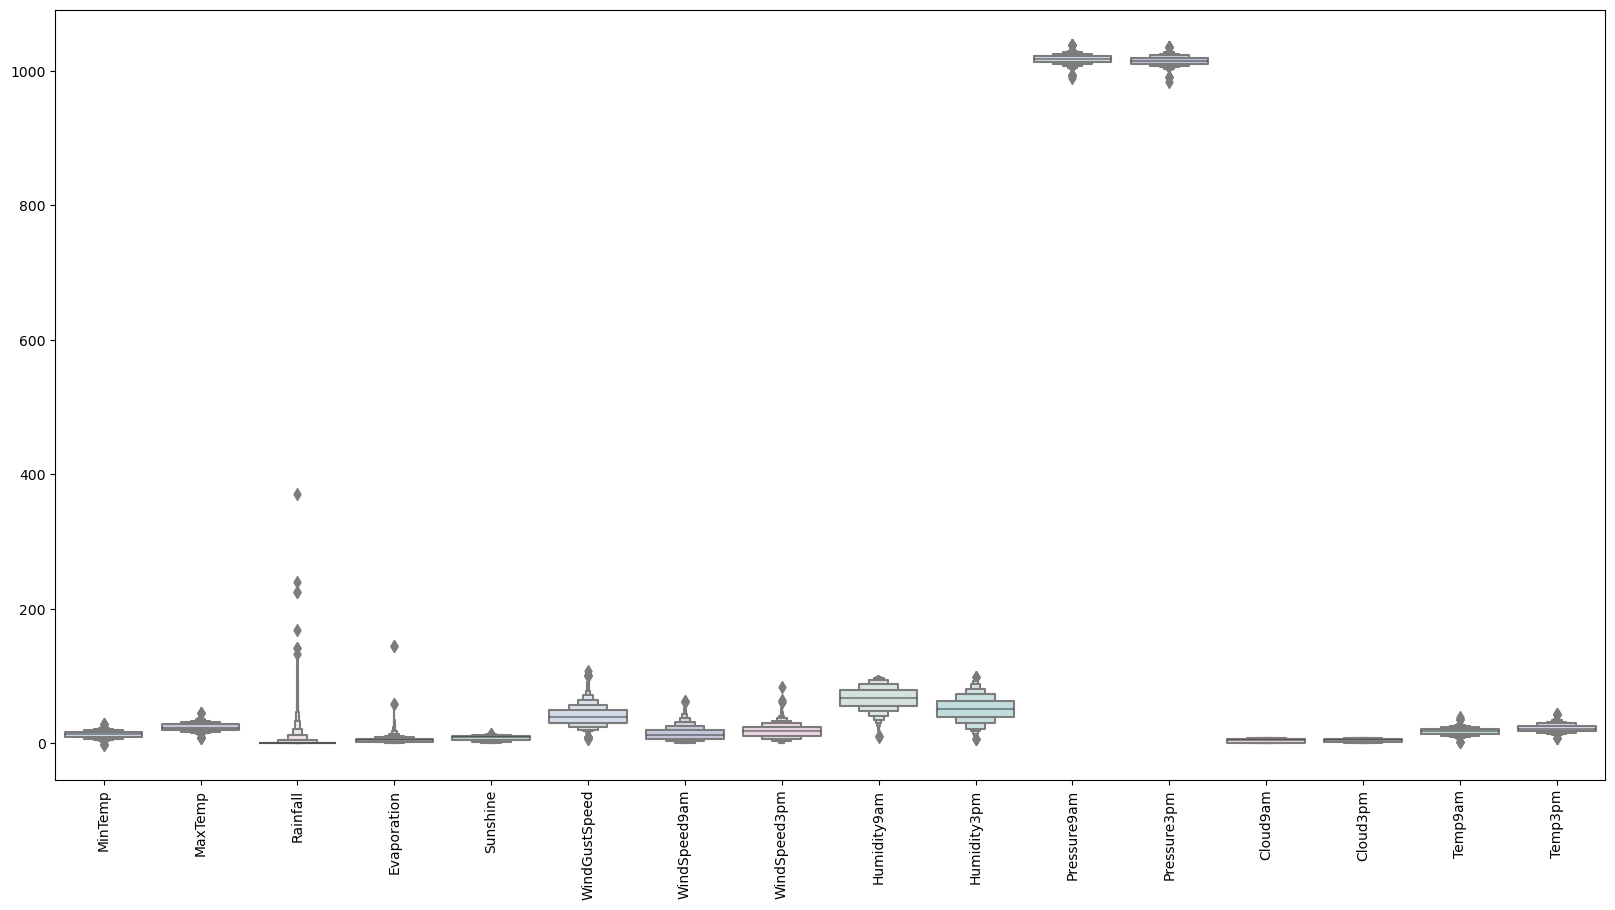

In [25]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colours)
plt.xticks(rotation=90)
plt.show()

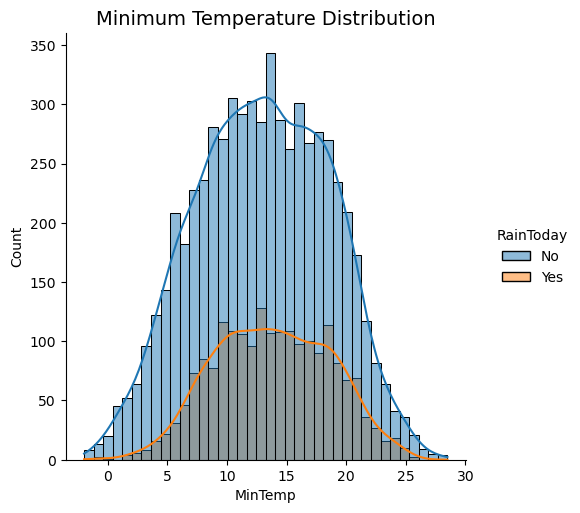

In [47]:
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

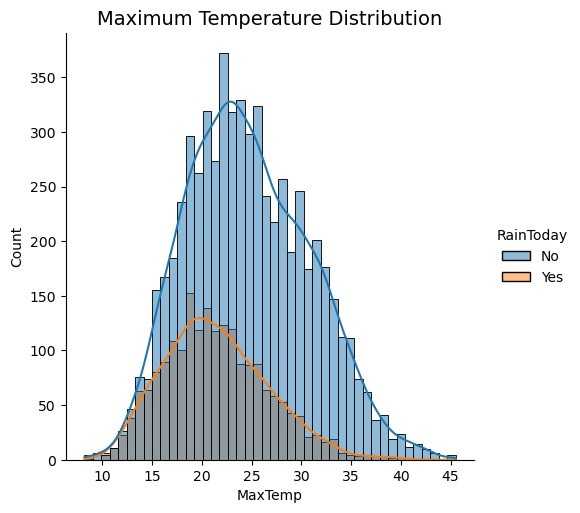

In [48]:
sns.displot(df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()


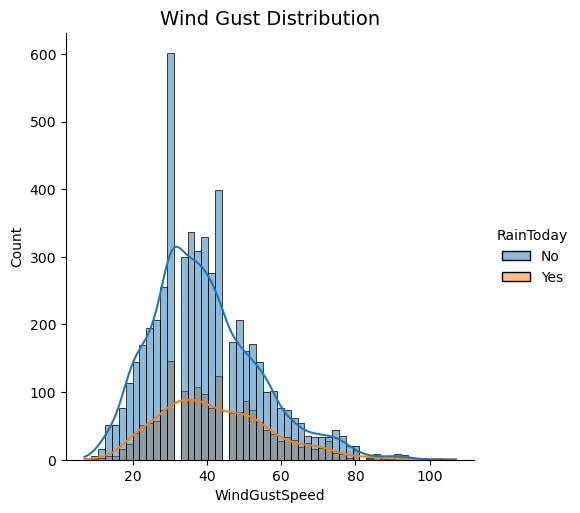

In [49]:
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

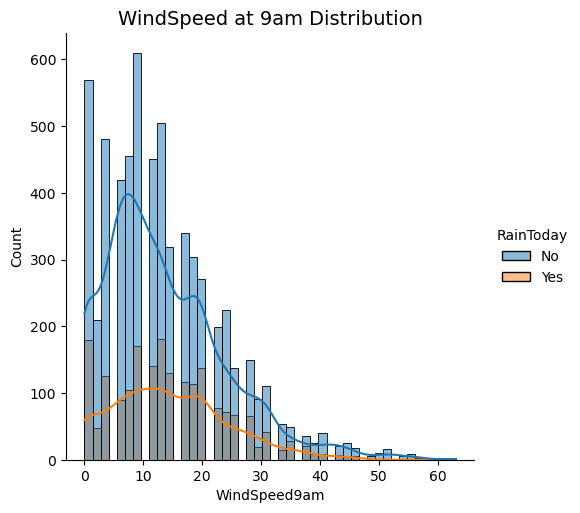

In [50]:
sns.displot(df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

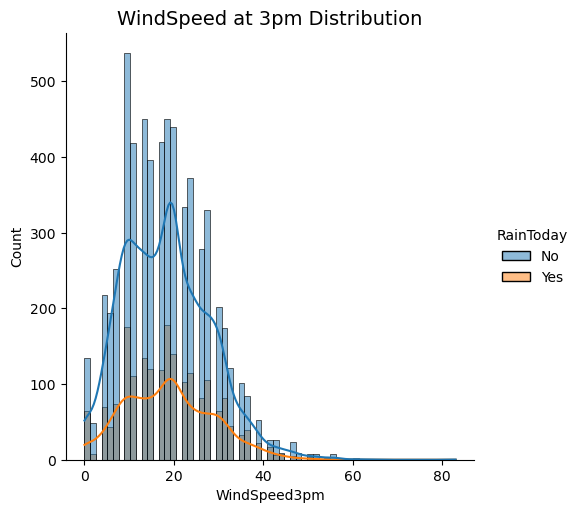

In [51]:
sns.displot(df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()


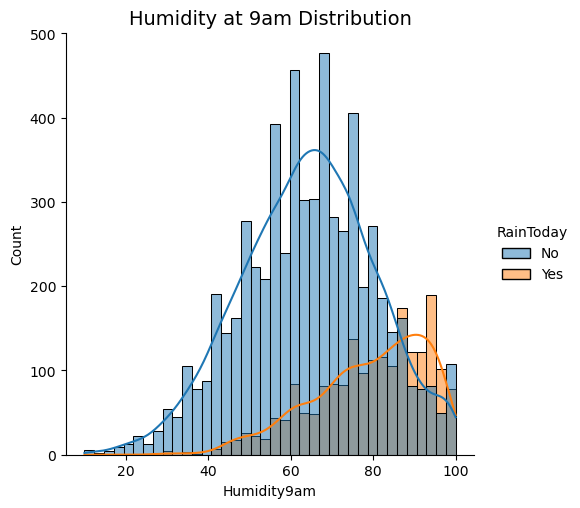

In [52]:
sns.displot(df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

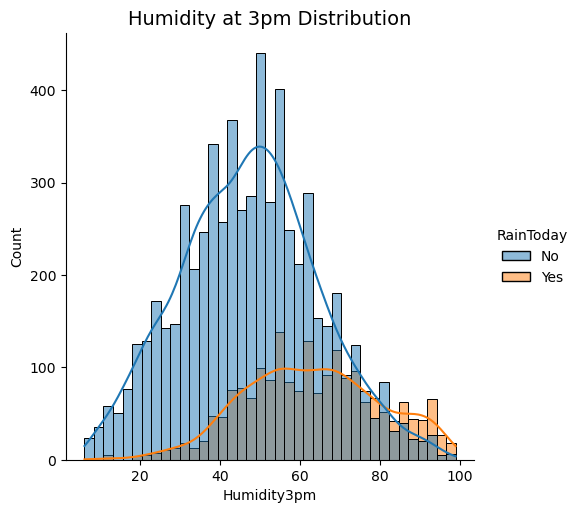

In [53]:
sns.displot(df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

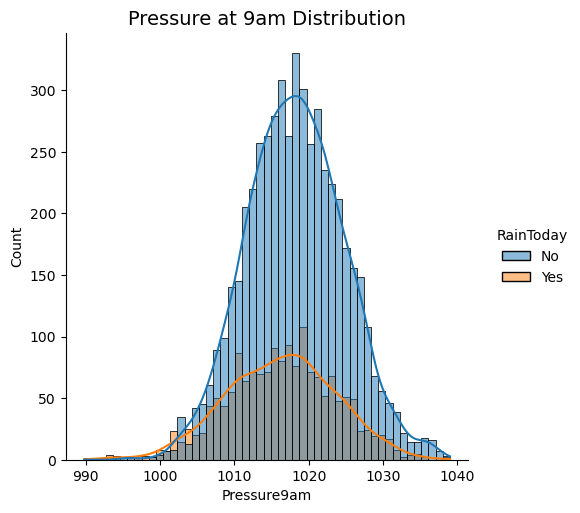

In [54]:
sns.displot(df, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

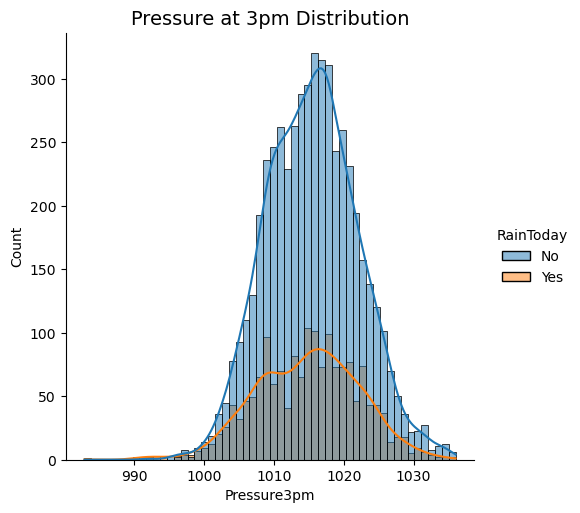

In [55]:
sns.displot(df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

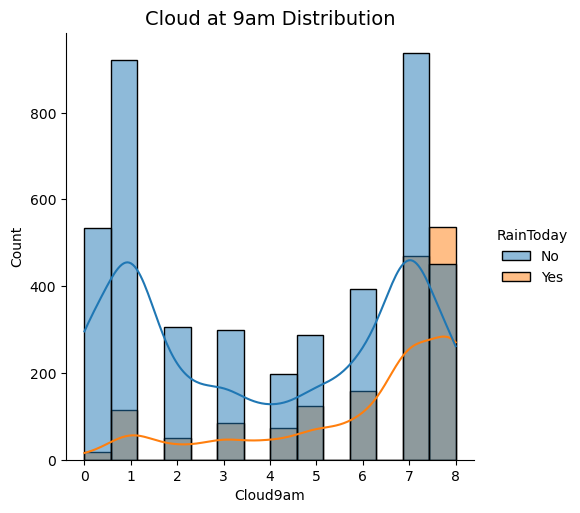

In [56]:
sns.displot(df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

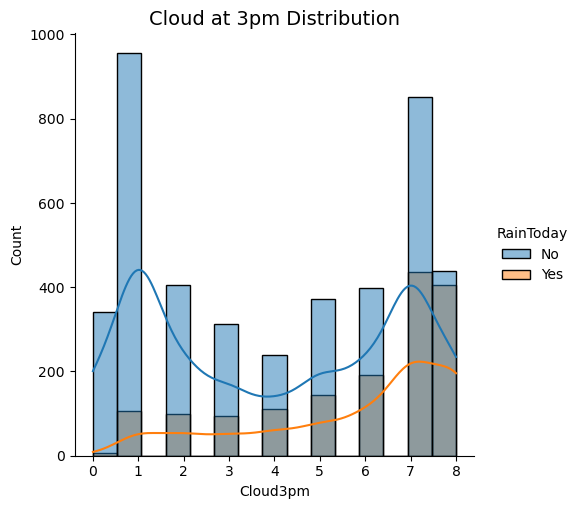

In [57]:
sns.displot(df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

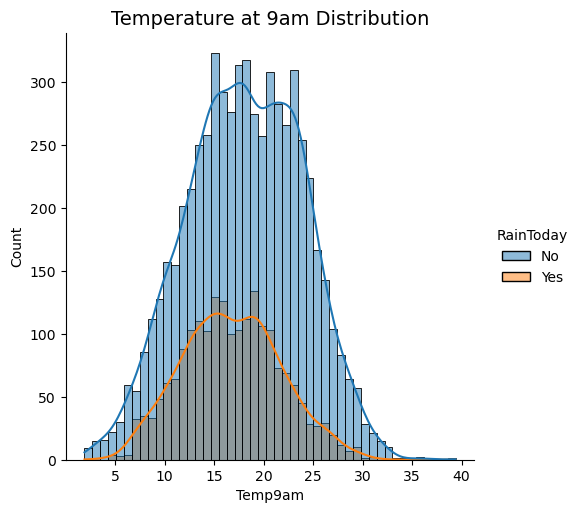

In [58]:
sns.displot(df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

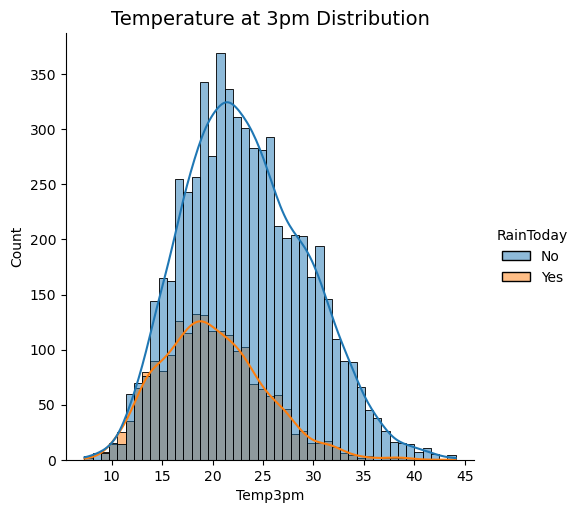

In [59]:
sns.displot(df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

In [61]:
windspeed_weather_df = df.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Adelaide,11.317073,16.404878
1,Albury,8.230088,14.283186
2,Brisbane,6.031088,9.655113
3,CoffsHarbour,15.394089,20.518883
4,Darwin,16.012000,20.204000


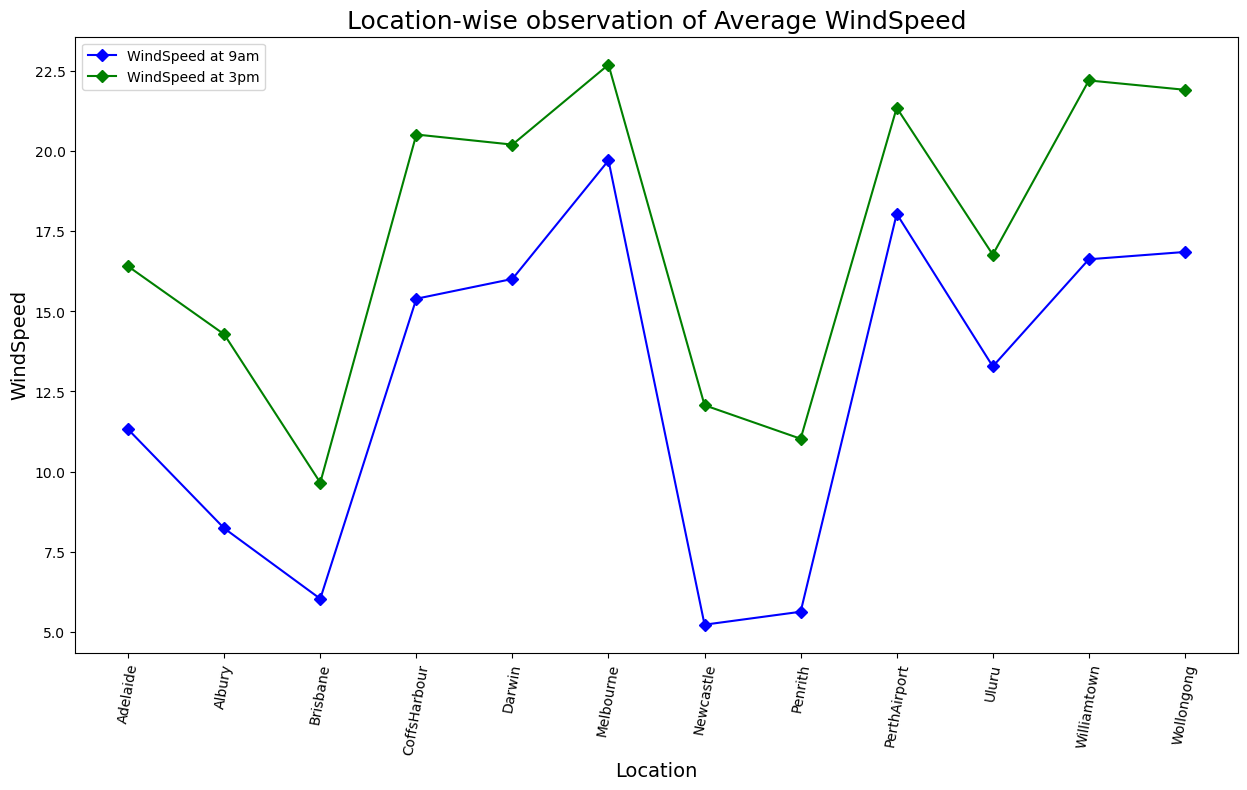

In [69]:
X = windspeed_weather_df.loc[:, 'Location']
Y1 = windspeed_weather_df['WindSpeed9am'] 
Y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'blue', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'green', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

In [71]:
humidity_weather_df = df.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

,Location,Humidity9am,Humidity3pm
0,Adelaide,59.029268,44.809756
1,Albury,72.604190,47.062845
2,Brisbane,66.472318,54.192374
3,CoffsHarbour,66.314239,60.663934
4,Darwin,63.828000,43.932000


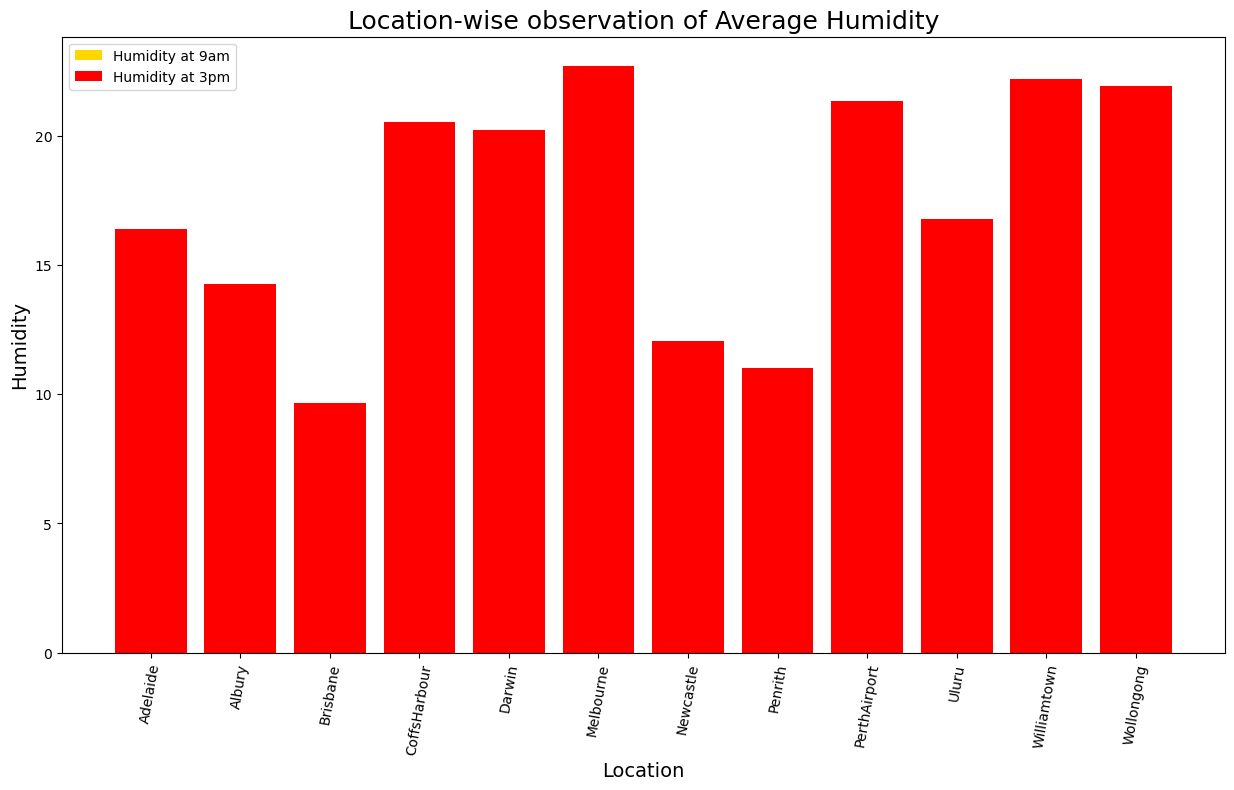

In [78]:
x = humidity_weather_df.loc[:, 'Location']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(X, Y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(X, Y2, color = 'red',label = 'Humidity at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Location-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

In [79]:
pressure_weather_df =df.groupby(['Location'])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.head()

,Location,Pressure9am,Pressure3pm
0,Adelaide,1020.091220,1018.074634
1,Albury,1017.581477,1014.981477
2,Brisbane,1018.123661,1015.031023
3,CoffsHarbour,1018.590805,1016.103460
4,Darwin,1013.373200,1009.524800


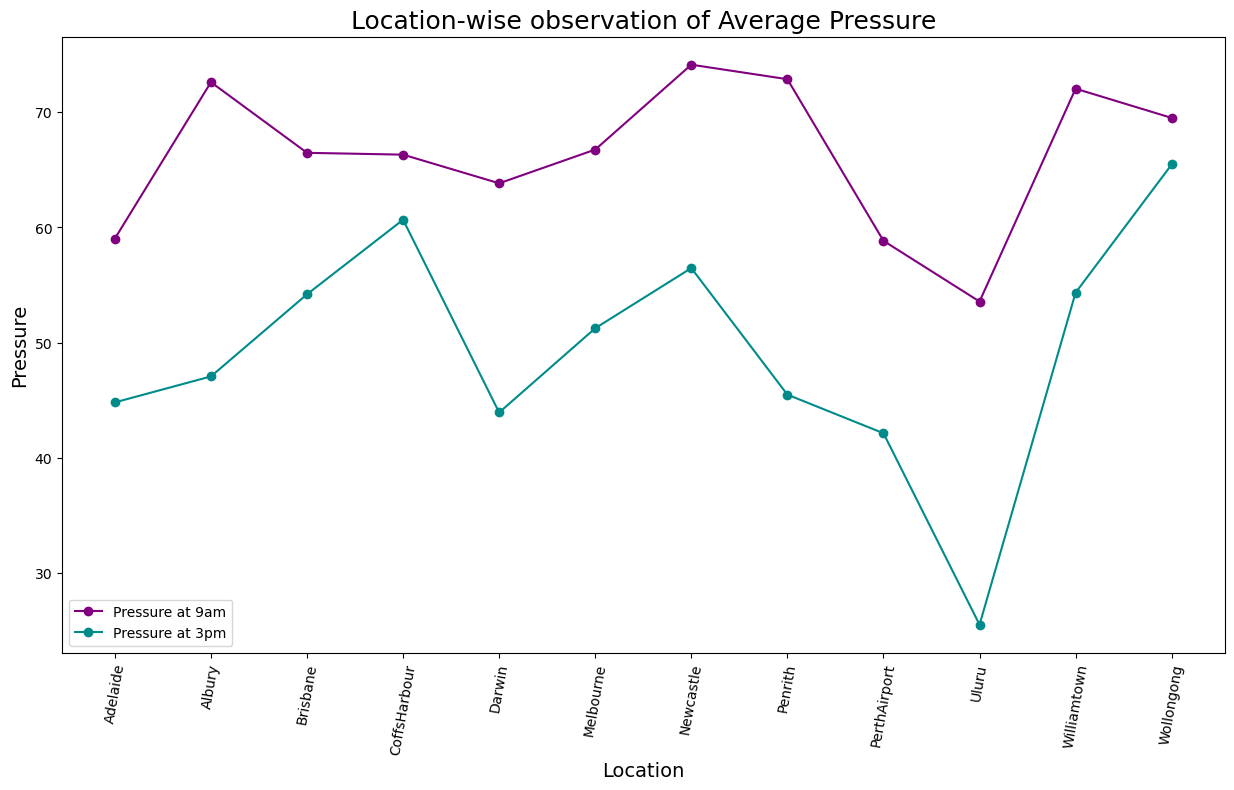

In [80]:
X = pressure_weather_df.loc[:, 'Location']
Y1 = pressure_weather_df['Pressure9am'] 
Y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Location-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()


In [81]:
location_weather_df = df.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm
0,Adelaide,10.980000,21.435122,15.861951,20.189756
1,Albury,10.045233,22.821729,14.555347,21.673539
2,Brisbane,15.372837,25.465052,20.690484,23.981456
3,CoffsHarbour,13.705082,23.273934,19.611620,21.744590
4,Darwin,21.324800,31.966800,25.601200,30.668000


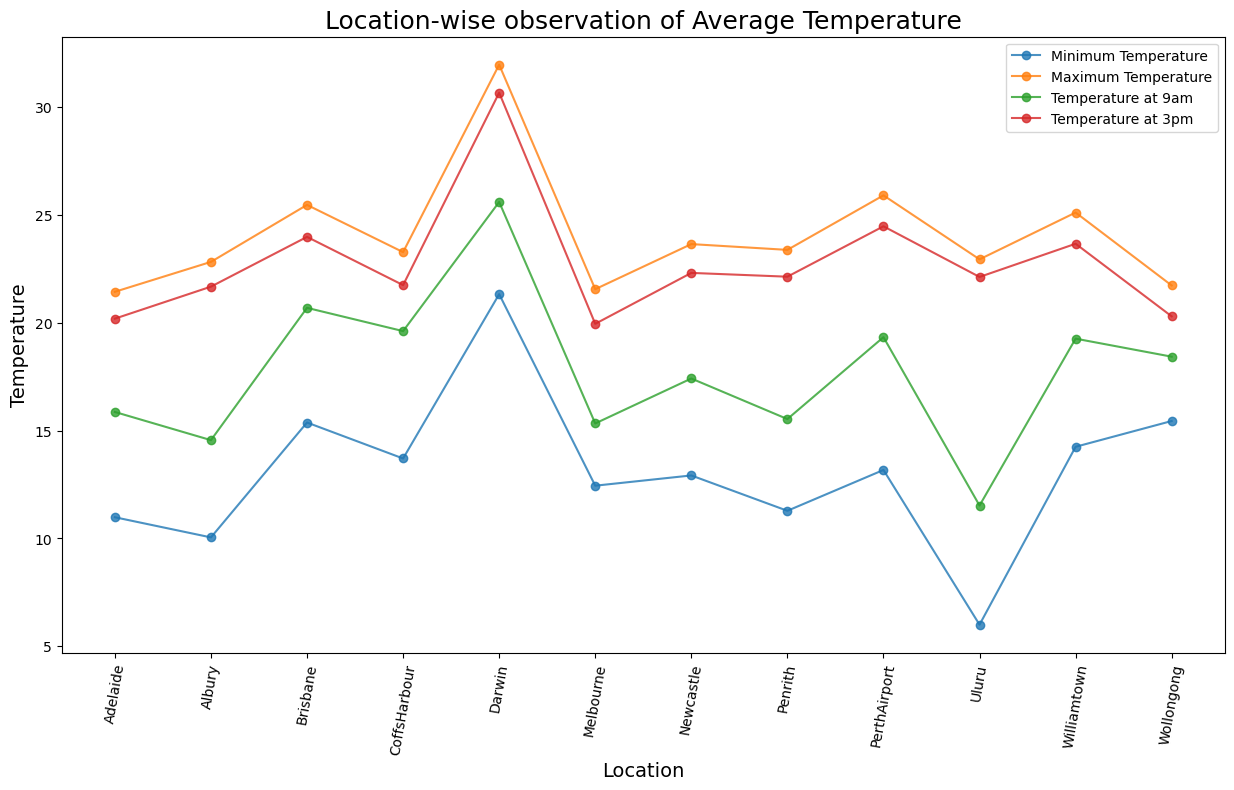

In [83]:
X = location_weather_df.loc[:, 'Location']
Y1 = location_weather_df['MinTemp'] 
Y2 = location_weather_df['MaxTemp']
Y3 = location_weather_df['Temp9am'] 
Y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8) 
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Location-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()